# **Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

## **Importing the dataset**

In [2]:
dataset = pd.read_csv('loan_approval_dataset.csv')

# **Encoding the target variable**

In [3]:
dataset['loan_status'] = dataset['loan_status'].map({'loan_approved': 1, 'loan_rejected': 0})

# **Handling missing values**

In [4]:
dataset_clean = dataset.dropna()

# **Defining Feature matrix and Target vector**

In [5]:
X = dataset_clean.drop('loan_status', axis=1)
y = dataset_clean['loan_status']

In [6]:
X.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,defaults_no,...,home_mortgage,home_other,home_own,home_rent,intent_debtconsolidation,intent_education,intent_homeimprovement,intent_medical,intent_personal,intent_venture
0,22.0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,1,...,0,0,0,1,0,0,0,0,1,0
1,21.0,3,12282.0,0,1000.0,11.14,0.08,2.0,504,0,...,0,0,1,0,0,1,0,0,0,0
2,25.0,3,12438.0,3,5500.0,12.87,0.44,3.0,635,1,...,1,0,0,0,0,0,0,1,0,0
3,23.0,1,79753.0,0,35000.0,15.23,0.44,2.0,675,1,...,0,0,0,1,0,0,0,1,0,0
4,24.0,4,66135.0,1,35000.0,14.27,0.53,4.0,586,1,...,0,0,0,1,0,0,0,1,0,0


In [7]:
y.head()

,loan_status
0,1
1,0
2,1
3,1
4,1


## **Feature Scaling**

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled

array([[-0.95353824,  1.52526448, -0.10408961, ..., -0.48425217,
         2.22681082, -0.45857996],
       [-1.11896309,  0.84919205, -0.84600467, ..., -0.48425217,
        -0.44907272, -0.45857996],
       [-0.45726369,  0.84919205, -0.84406489, ...,  2.06503979,
        -0.44907272, -0.45857996],
       ...,
       [ 0.8661351 , -1.17902525, -0.29068126, ..., -0.48425217,
        -0.44907272, -0.45857996],
       [ 0.2044357 , -0.50295282, -0.58634807, ..., -0.48425217,
        -0.44907272, -0.45857996],
       [-0.62268854,  0.84919205, -0.35699428, ..., -0.48425217,
        -0.44907272, -0.45857996]])

## **Split the dataset into training and testing sets**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Training the Model on training dataset**

In [11]:
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

## **Predicting the Test Set results**

In [12]:
y_pred = model.predict(X_test)
comparison = np.concatenate(
    (y_pred.reshape(len(y_pred), 1), y_test.to_numpy().reshape(len(y_test), 1)), axis=1
)
comparison_df = pd.DataFrame(comparison, columns=['Predicted', 'Actual'])
print(comparison_df.head(20))

    Predicted  Actual
0           0       0
1           0       0
2           1       1
3           0       0
4           0       1
5           0       0
6           0       0
7           1       1
8           0       1
9           1       0
10          1       1
11          0       0
12          0       1
13          0       0
14          0       0
15          0       0
16          0       0
17          0       0
18          0       0
19          0       0


# **Building the Confusion Matrix**

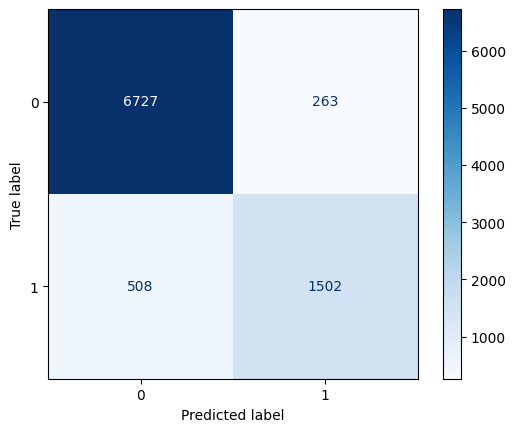

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

# **Calculating Accuracy**

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Rate: {accuracy:.4f}")

Accuracy Rate: 0.9143


# **Calculating precision, recall and f1-score and plotting the graph**

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6990
           1       0.85      0.75      0.80      2010

    accuracy                           0.91      9000
   macro avg       0.89      0.85      0.87      9000
weighted avg       0.91      0.91      0.91      9000



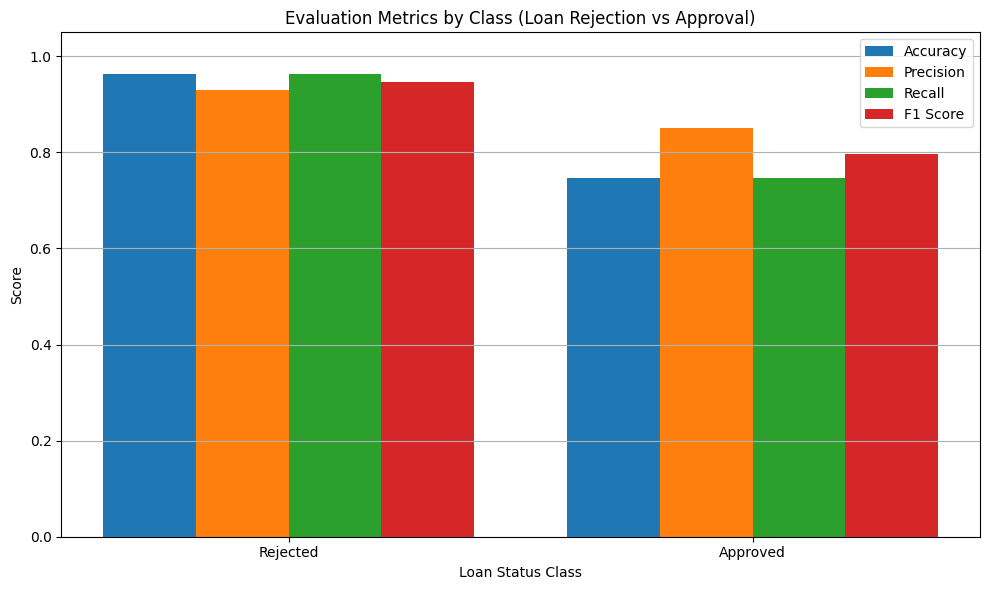

In [16]:
accuracy = cm.diagonal() / cm.sum(axis=1)
precision = precision_score(y_test, y_pred, average=None, labels=[0, 1])
recall = recall_score(y_test, y_pred, average=None, labels=[0, 1])
f1 = f1_score(y_test, y_pred, average=None, labels=[0, 1])

# Class labels (0: Rejected, 1: Approved)
classes = ['Rejected', 'Approved']
x = np.arange(len(classes))
width = 0.2

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

plt.xlabel('Loan Status Class')
plt.ylabel('Score')
plt.title('Evaluation Metrics by Class (Loan Rejection vs Approval)')
plt.xticks(x, classes)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Analyzing Misclassifications**

In [17]:
misclassified_indices = np.where(y_pred != y_test)[0]
comparison_df = pd.DataFrame({
    'Predicted': y_pred[misclassified_indices],
    'Actual': y_test.iloc[misclassified_indices].values
})
misclassified_rows = X_test[misclassified_indices]
misclassified_features = pd.DataFrame(scaler.inverse_transform(misclassified_rows), columns=X.columns)
misclassified_full = pd.concat([comparison_df.reset_index(drop=True), misclassified_features.reset_index(drop=True)], axis=1)
misclassified_full.head(5)

,Predicted,Actual,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,...,home_mortgage,home_other,home_own,home_rent,intent_debtconsolidation,intent_education,intent_homeimprovement,intent_medical,intent_personal,intent_venture
0,0,1,42.0,3.000000e+00,67974.0,20.0,10000.0,15.41,0.15,11.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,25.0,3.000000e+00,88778.0,0.0,12000.0,11.11,0.14,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,0,29.0,-2.220446e-16,54924.0,8.0,12000.0,12.99,0.22,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,1,24.0,4.000000e+00,39682.0,2.0,1500.0,9.91,0.04,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,39.0,3.000000e+00,54331.0,12.0,8000.0,12.53,0.15,14.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
